# BEGINNER LEVEL Task (PART 01)

## Task 1: Exploratory Sales Analysis
###  Description: Perform exploratory data analysis (EDA) on sales data to understand trends, seasonality, and missing values.

## Features:
###  Load and clean the dataset with Pandas.
###  Generate descriptive statistics (mean, median, mode).
###  Visualize sales over time using line and bar charts.

## Tech Stack: Python, Pandas, Matplotlib/Seaborn.
## Learning Outcomes: Learn data cleaning, basic visualization, and summary statistics.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#import data from CSCV File
train_df = pd.read_csv(r"C:\Users\Saud\Desktop\data analyst\internboot\Project\store-sales-time-series-forecasting\train.csv", low_memory= False)
store_df = pd.read_csv(r"C:\Users\Saud\Desktop\data analyst\internboot\Project\store-sales-time-series-forecasting\stores.csv", low_memory= False)
transactions_df = pd.read_csv(r"C:\Users\Saud\Desktop\data analyst\internboot\Project\store-sales-time-series-forecasting\transactions.csv", low_memory= False)
holidays_events_df = pd.read_csv(r"C:\Users\Saud\Desktop\data analyst\internboot\Project\store-sales-time-series-forecasting\holidays_events.csv", low_memory= False)
sample_submission_df = pd.read_csv(r"C:\Users\Saud\Desktop\data analyst\internboot\Project\store-sales-time-series-forecasting\sample_submission.csv", low_memory= False)
test_df = pd.read_csv(r"C:\Users\Saud\Desktop\data analyst\internboot\Project\store-sales-time-series-forecasting\test.csv", low_memory= False)
oil_df = pd.read_csv(r"C:\Users\Saud\Desktop\data analyst\internboot\Project\store-sales-time-series-forecasting\oil.csv", low_memory= False)

In [3]:
# First print 10 raw of store data set
store_df.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [4]:
#check the information related to store 
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [5]:
#Check null values 
store_df.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [6]:
# First print 10 raw of Train data set
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,1/1/2013,1,AUTOMOTIVE,0.0,0
1,1,1/1/2013,1,BABY CARE,0.0,0
2,2,1/1/2013,1,BEAUTY,0.0,0
3,3,1/1/2013,1,BEVERAGES,0.0,0
4,4,1/1/2013,1,BOOKS,0.0,0
5,5,1/1/2013,1,BREAD/BAKERY,0.0,0
6,6,1/1/2013,1,CELEBRATION,0.0,0
7,7,1/1/2013,1,CLEANING,0.0,0
8,8,1/1/2013,1,DAIRY,0.0,0
9,9,1/1/2013,1,DELI,0.0,0


In [7]:
#check the information related to train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1048575 non-null  int64  
 1   date         1048575 non-null  object 
 2   store_nbr    1048575 non-null  int64  
 3   family       1048575 non-null  object 
 4   sales        1048575 non-null  float64
 5   onpromotion  1048575 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 48.0+ MB


In [8]:
#Check null values
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [9]:
# Merege store and train data and print 
merged_df = pd.merge(train_df, store_df, on='store_nbr', how='left')
merged_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,1/1/2013,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,1/1/2013,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,1/1/2013,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,1/1/2013,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,1/1/2013,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,8/13/2014,3,POULTRY,974.098,1,Quito,Pichincha,D,8
1048571,1048571,8/13/2014,3,PREPARED FOODS,324.293,0,Quito,Pichincha,D,8
1048572,1048572,8/13/2014,3,PRODUCE,10.000,1,Quito,Pichincha,D,8
1048573,1048573,8/13/2014,3,SCHOOL AND OFFICE SUPPLIES,0.000,0,Quito,Pichincha,D,8


In [10]:
#check the information related to mergerd
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1048575 non-null  int64  
 1   date         1048575 non-null  object 
 2   store_nbr    1048575 non-null  int64  
 3   family       1048575 non-null  object 
 4   sales        1048575 non-null  float64
 5   onpromotion  1048575 non-null  int64  
 6   city         1048575 non-null  object 
 7   state        1048575 non-null  object 
 8   type         1048575 non-null  object 
 9   cluster      1048575 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 80.0+ MB


In [11]:
#Describe the sales from 0merged data
merged_df['sales'].describe()

count    1.048575e+06
mean     2.445326e+02
std      8.065892e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.200000e+02
max      4.627100e+04
Name: sales, dtype: float64

In [12]:
#Generate descriptive statistics (mean, median, mode).
print("Mean Sales:", merged_df['sales'].mean())
print("Median Sales:", merged_df['sales'].median())
print("Mode Sales:", merged_df['sales'].mode()[0])

Mean Sales: 244.53261022392263
Median Sales: 1.0
Mode Sales: 0.0


In [13]:
# To make chart sure that date is datetime if not then convert
merged_df['date'] = pd.to_datetime(merged_df['date'])

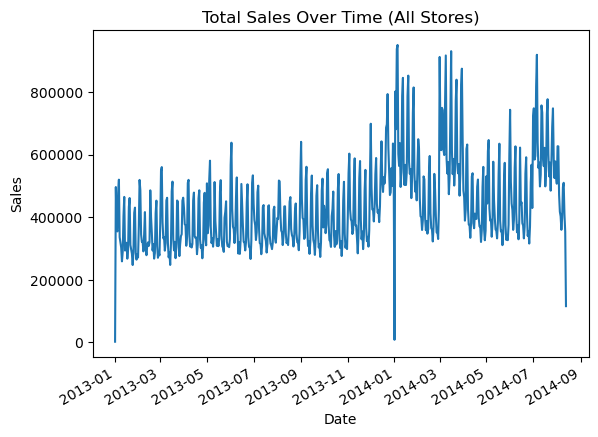

In [14]:
#Visualize sales over time using line and bar charts.


#Overall Daily Sales Trend
daily_sales = merged_df.groupby('date')['sales'].sum()
daily_sales.plot()
plt.title("Total Sales Over Time (All Stores)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

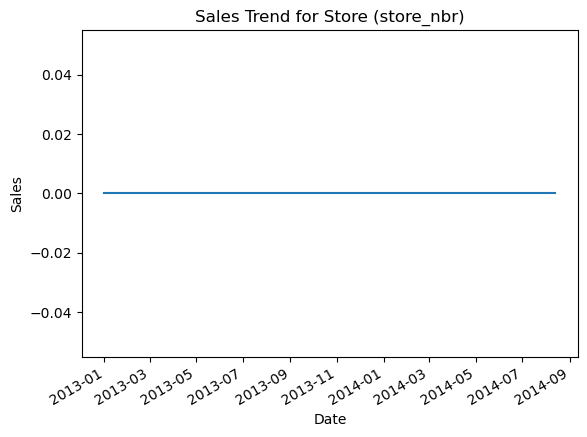

In [15]:
#Visualize sales over time using line and bar charts.


#Sales Trend of Specific Store
store_nbr = 22
store_sales = merged_df[merged_df['store_nbr'] == store_nbr].groupby('date')['sales'].sum()
store_sales.plot()
plt.title("Sales Trend for Store (store_nbr)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

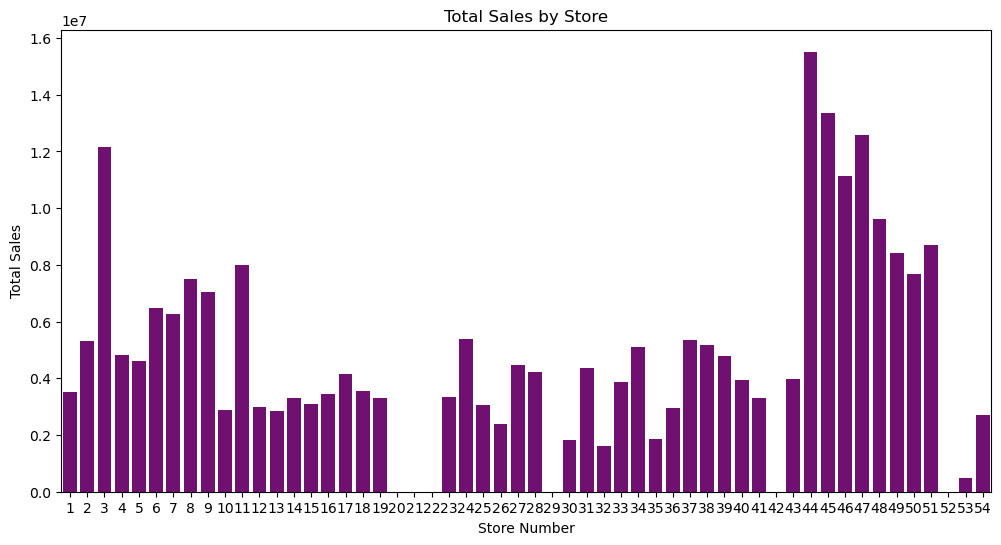

In [16]:
#Visualize sales over time using line and bar charts.


#Total Sales per Store
total_sales_per_store = merged_df.groupby('store_nbr')['sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='store_nbr', y='sales', data=total_sales_per_store,  color='purple')
plt.title("Total Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

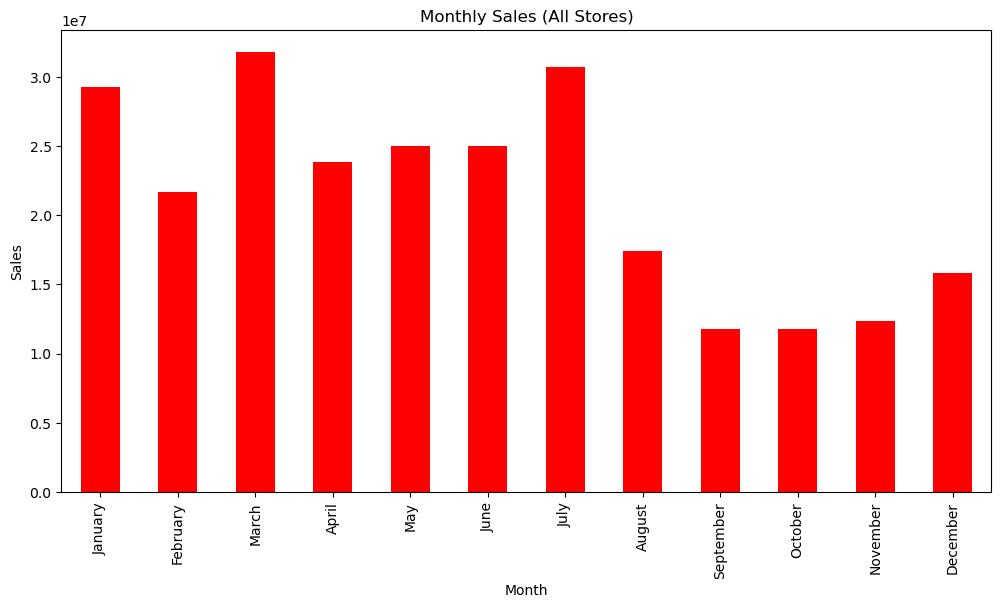

In [17]:
#Visualize sales over time using line and bar charts.


#Sales per Month (Seasonality)

merged_df['month'] = merged_df['date'].dt.month_name()

monthly_sales = merged_df.groupby('month')['sales'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar', color='red')
plt.title("Monthly Sales (All Stores)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

Text(0, 0.5, 'Sales')

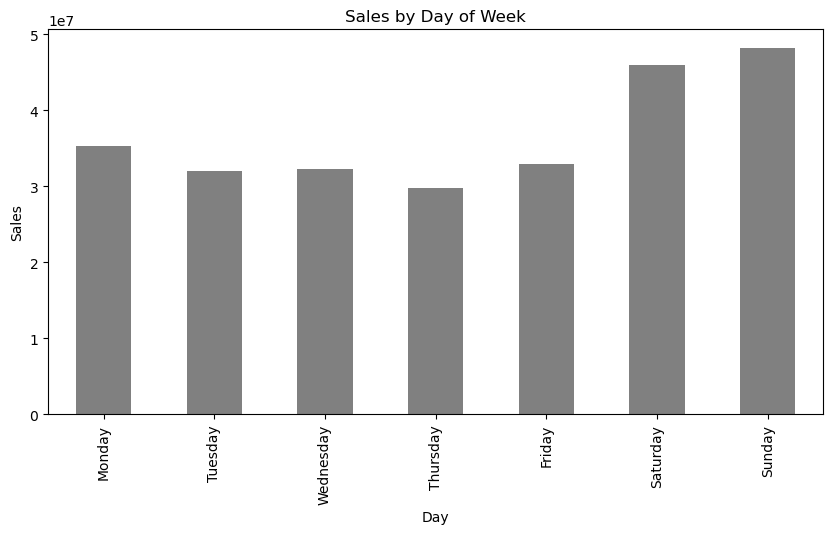

In [18]:
#Visualize sales over time using line and bar charts.



#Day of Week Sales
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

weekday_sales = merged_df.groupby('day_of_week')['sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,5))
weekday_sales.plot(kind='bar', color='gray')
plt.title("Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Sales")

# BEGINNER LEVEL Task (PART 02)

## Task 2: Simple Sales Forecast with Moving Average
### Description: Implement a basic forecasting method using moving averages.

## Features:
###  Compute rolling averages for weekly and monthly sales.
###  Compare forecasts vs. actual sales.
###  Plot trend lines.

## Tech Stack: Python, Pandas.
## Learning Outcomes: Understand time windows, moving averages, and trend smoothing.

In [19]:
# Aggregate daily sales
daily_sales = merged_df.groupby('date')['sales'].sum().reset_index()

In [20]:
# 7-day and 30-day rolling averages
daily_sales['7_day_MA'] = daily_sales['sales'].rolling(window=7).mean()
print(daily_sales['7_day_MA'])
daily_sales['30_day_MA'] = daily_sales['sales'].rolling(window=30).mean()
print(daily_sales['30_day_MA'])

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
584    452976.802298
585    436374.453600
586    427570.349455
587    418527.597429
588    377537.309868
Name: 7_day_MA, Length: 589, dtype: float64
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
584    569166.956765
585    568301.542839
586    556729.736929
587    544071.218001
588    528441.724896
Name: 30_day_MA, Length: 589, dtype: float64


In [21]:
# Compare Forecasts vs. Actual Sales

# print tail 
daily_sales[['date', 'sales', '7_day_MA', '30_day_MA']].tail(10)

,date,sales,7_day_MA,30_day_MA
579,2014-08-04,471173.304022,552236.541598,606261.202614
580,2014-08-05,417197.476176,536872.848909,589558.565278
581,2014-08-06,402914.370941,511852.478289,581704.830012
582,2014-08-07,359701.532989,487177.903259,575118.497861
583,2014-08-08,397759.938983,471596.923838,569228.782162
584,2014-08-09,496192.787084,452976.802298,569166.956765
585,2014-08-10,509681.765002,436374.453600,568301.542839
586,2014-08-11,409544.575013,427570.349455,556729.736929
587,2014-08-12,353898.211991,418527.597429,544071.218001
588,2014-08-13,115982.358014,377537.309868,528441.724896


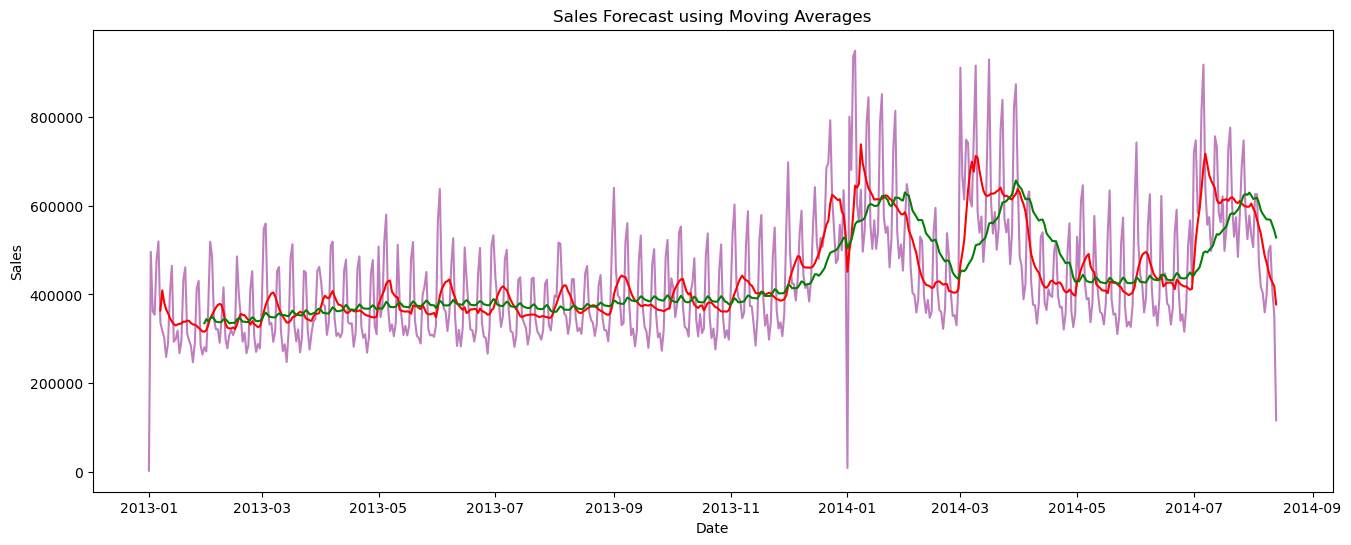

In [22]:
#Plot Actual Sales vs. Moving Averages
plt.figure(figsize=(16,6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Actual Sales', color='purple', alpha=0.5)
plt.plot(daily_sales['date'], daily_sales['7_day_MA'], label='7-Day MA', color='red')
plt.plot(daily_sales['date'], daily_sales['30_day_MA'], label='30-Day MA', color='green')
plt.title("Sales Forecast using Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# BEGINNER LEVEL Task (PART 03)

## Task 3: Linear Regression for Sales Prediction
### Description: Build a simple regression model to predict future sales based on time and promotions.

## Features:
###  Select features like date, promotions, and holidays.
###  Train/Test split of the dataset.
###  Build a Linear Regression model.

## Tech Stack: Python, Pandas, Scikit-learn.
## Learning Outcomes: Gain first hands-on experience with =regression modeling

In [23]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [24]:
#Train Date is alreadyu load 

#convert date coloumn in datetime coloumn
train_df['date']= pd.to_datetime(train_df['date'])

In [25]:
# Extract useful time features
train_df['year'] = train_df['date'].dt.year
print(train_df['year'])
train_df['month'] = train_df['date'].dt.month
print(train_df['month'])
train_df['day'] = train_df['date'].dt.day
print(train_df['day'])
train_df['day_of_week'] = train_df['date'].dt.dayofweek
print(train_df['day_of_week'])

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
1048570    2014
1048571    2014
1048572    2014
1048573    2014
1048574    2014
Name: year, Length: 1048575, dtype: int32
0          1
1          1
2          1
3          1
4          1
          ..
1048570    8
1048571    8
1048572    8
1048573    8
1048574    8
Name: month, Length: 1048575, dtype: int32
0           1
1           1
2           1
3           1
4           1
           ..
1048570    13
1048571    13
1048572    13
1048573    13
1048574    13
Name: day, Length: 1048575, dtype: int32
0          1
1          1
2          1
3          1
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: day_of_week, Length: 1048575, dtype: int32


In [26]:
# Select  features of Features (X) & Target (Y) 
x= train_df[['store_nbr', 'onpromotion','year', 'month', 'day', 'day_of_week']]
print(x)
y= train_df['sales']
print(y)

         store_nbr  onpromotion  year  month  day  day_of_week
0                1            0  2013      1    1            1
1                1            0  2013      1    1            1
2                1            0  2013      1    1            1
3                1            0  2013      1    1            1
4                1            0  2013      1    1            1
...            ...          ...   ...    ...  ...          ...
1048570          3            1  2014      8   13            2
1048571          3            0  2014      8   13            2
1048572          3            1  2014      8   13            2
1048573          3            0  2014      8   13            2
1048574          3            0  2014      8   13            2

[1048575 rows x 6 columns]
0            0.000
1            0.000
2            0.000
3            0.000
4            0.000
            ...   
1048570    974.098
1048571    324.293
1048572     10.000
1048573      0.000
1048574     69.116
Name: s

In [27]:
# Train/Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [28]:
#  Build a Linear Regression model.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
#Predict and Evaluate
y_pred =  model.predict(x_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 648637.2910188797
R-squared Score (R2): 0.012630434941210411


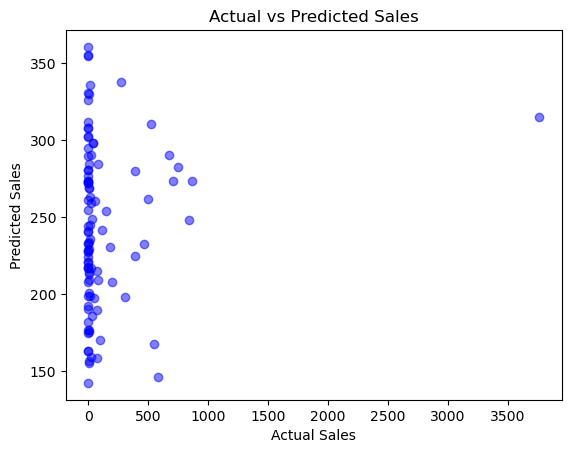

In [30]:
#Visualize: Actual vs. Predicted Sales

plt.scatter(y_test[:100], y_pred[:100], alpha=0.5, color='blue')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# INTERMEDIATE TASK (PART 01)

## Task 1: Feature Engineering for Sales Data
### Description: Create new features to improve prediction accuracy.

## Features:
###  Extract day, month, year, and weekday from date.
###  Create holiday/weekend flags.
###  Add lag features (previous week/month sales).

## Tech Stack: Python, Pandas.
## Learning Outcomes: Learn how feature engineering impacts regression models.

In [31]:
# Extract useful time features
train_df['day'] = train_df['date'].dt.day
print(train_df['day'])
train_df['month'] = train_df['date'].dt.month
print(train_df['month'])
train_df['year'] = train_df['date'].dt.year
print(train_df['year'])
train_df['day_of_week'] = train_df['date'].dt.dayofweek
print(train_df['day_of_week'])

0           1
1           1
2           1
3           1
4           1
           ..
1048570    13
1048571    13
1048572    13
1048573    13
1048574    13
Name: day, Length: 1048575, dtype: int32
0          1
1          1
2          1
3          1
4          1
          ..
1048570    8
1048571    8
1048572    8
1048573    8
1048574    8
Name: month, Length: 1048575, dtype: int32
0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
1048570    2014
1048571    2014
1048572    2014
1048573    2014
1048574    2014
Name: year, Length: 1048575, dtype: int32
0          1
1          1
2          1
3          1
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: day_of_week, Length: 1048575, dtype: int32


In [32]:
#print or Analyze data
holidays_events_df.head(10)

,date,type,locale,locale_name,description,transferred
0,3/2/2012,Holiday,Local,Manta,Fundacion de Manta,False
1,4/1/2012,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,4/12/2012,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,4/14/2012,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4/21/2012,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,5/12/2012,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,6/23/2012,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,6/25/2012,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,6/25/2012,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,6/25/2012,Holiday,Local,Machala,Fundacion de Machala,False


In [33]:
#convert the date column into date time coloumn
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])

In [34]:
#Check null values
holidays_events_df.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [35]:
# Create Weekend and Holiday Flags


# Only take relevant columns
holidays_events_df = holidays_events_df[['date', 'type']] 
print(holidays_events_df)
holidays_events_df['is_holiday'] = 1
print(holidays_events_df['is_holiday'])

          date        type
0   2012-03-02     Holiday
1   2012-04-01     Holiday
2   2012-04-12     Holiday
3   2012-04-14     Holiday
4   2012-04-21     Holiday
..         ...         ...
345 2017-12-22  Additional
346 2017-12-23  Additional
347 2017-12-24  Additional
348 2017-12-25     Holiday
349 2017-12-26  Additional

[350 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
345    1
346    1
347    1
348    1
349    1
Name: is_holiday, Length: 350, dtype: int64


In [36]:
#Check data because add one coloumn
holidays_events_df.head(10)

,date,type,is_holiday
0,2012-03-02,Holiday,1
1,2012-04-01,Holiday,1
2,2012-04-12,Holiday,1
3,2012-04-14,Holiday,1
4,2012-04-21,Holiday,1
5,2012-05-12,Holiday,1
6,2012-06-23,Holiday,1
7,2012-06-25,Holiday,1
8,2012-06-25,Holiday,1
9,2012-06-25,Holiday,1


In [37]:
#Check there is NAN is is_holiday coloumn 
holidays_events_df['is_holiday'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
345    False
346    False
347    False
348    False
349    False
Name: is_holiday, Length: 350, dtype: bool

In [38]:
#Check and count the value of holidays type 
holidays_events_df['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [39]:
#merge holidays data from train data 
train_df = pd.merge(train_df, holidays_events_df, on='date', how='left')
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,type,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,1.0
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,1.0
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,1.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,1.0
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,1.0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,2013,1,1,1,Holiday,1.0
6,6,2013-01-01,1,CELEBRATION,0.0,0,2013,1,1,1,Holiday,1.0
7,7,2013-01-01,1,CLEANING,0.0,0,2013,1,1,1,Holiday,1.0
8,8,2013-01-01,1,DAIRY,0.0,0,2013,1,1,1,Holiday,1.0
9,9,2013-01-01,1,DELI,0.0,0,2013,1,1,1,Holiday,1.0


In [40]:
# Replace NaN with 0 (non-holiday)
train_df['is_holiday'] = train_df['is_holiday'].fillna(0)
print(train_df['is_holiday'])

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1064608    0.0
1064609    0.0
1064610    0.0
1064611    0.0
1064612    0.0
Name: is_holiday, Length: 1064613, dtype: float64


In [41]:
# Add is_weekend flag
train_df['is_weekend'] = train_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
print(train_df['is_weekend'])

0          0
1          0
2          0
3          0
4          0
          ..
1064608    0
1064609    0
1064610    0
1064611    0
1064612    0
Name: is_weekend, Length: 1064613, dtype: int64


In [42]:
#print merge data after add is-weekend and is-holidays coloumn 
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,type,is_holiday,is_weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,1.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,1.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,1.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,1.0,0
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,1.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,2013,1,1,1,Holiday,1.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0,2013,1,1,1,Holiday,1.0,0
7,7,2013-01-01,1,CLEANING,0.0,0,2013,1,1,1,Holiday,1.0,0
8,8,2013-01-01,1,DAIRY,0.0,0,2013,1,1,1,Holiday,1.0,0
9,9,2013-01-01,1,DELI,0.0,0,2013,1,1,1,Holiday,1.0,0


In [43]:
#Add Lag Features (Previous Week & Month Sales)


# Previous day's sales (for each store)
train_df['lag_1'] = train_df.groupby('store_nbr')['sales'].shift(1)
print(train_df['lag_1'])
# Previous week's sales
train_df['lag_7'] = train_df.groupby('store_nbr')['sales'].shift(7)
print(train_df['lag_7'])
# Previous month's sales (30 days before)
train_df['lag_30'] = train_df.groupby('store_nbr')['sales'].shift(30)
print(train_df['lag_30'])

0              NaN
1            0.000
2            0.000
3            0.000
4            0.000
            ...   
1064608      0.000
1064609    974.098
1064610    324.293
1064611     10.000
1064612      0.000
Name: lag_1, Length: 1064613, dtype: float64
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
1064608     21.000
1064609    135.000
1064610      0.000
1064611    700.607
1064612    402.000
Name: lag_7, Length: 1064613, dtype: float64
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
            ...  
1064608     0.000
1064609    55.238
1064610     9.000
1064611     0.000
1064612     8.000
Name: lag_30, Length: 1064613, dtype: float64


In [44]:
#print data after add leg feature  (Previous Week & Month Sales)
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,type,is_holiday,is_weekend,lag_1,lag_7,lag_30
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,1.0,0,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,NaN,NaN
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,NaN,NaN
6,6,2013-01-01,1,CELEBRATION,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,NaN,NaN
7,7,2013-01-01,1,CLEANING,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,NaN
8,8,2013-01-01,1,DAIRY,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,NaN
9,9,2013-01-01,1,DELI,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,NaN


In [45]:
#drop NAN 
train_df.dropna(inplace=True)

In [46]:
#print data
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,type,is_holiday,is_weekend,lag_1,lag_7,lag_30
30,30,2013-01-01,1,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
31,31,2013-01-01,1,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
32,32,2013-01-01,1,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
63,63,2013-01-01,10,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
64,64,2013-01-01,10,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
65,65,2013-01-01,10,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
96,96,2013-01-01,11,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
97,97,2013-01-01,11,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
98,98,2013-01-01,11,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
129,129,2013-01-01,12,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0


# INTERMEDIATE TASK (PART 02)

## Task 2: Multiple Regression Model
### Description: Build a multiple regression model using all engineered features.

## Features:
###  Use variables like promotions, holidays, and store type.
###  Train a multiple regression model.
###  Evaluate using RMSE & MAE.

## Tech Stack: Python, Pandas, Scikit-learn.
## Learning Outcomes: Understand multiple regression and evaluation metrics.

In [47]:
#Import libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [48]:
#check data 
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,type,is_holiday,is_weekend,lag_1,lag_7,lag_30
30,30,2013-01-01,1,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
31,31,2013-01-01,1,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
32,32,2013-01-01,1,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
63,63,2013-01-01,10,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
64,64,2013-01-01,10,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
65,65,2013-01-01,10,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
96,96,2013-01-01,11,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
97,97,2013-01-01,11,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
98,98,2013-01-01,11,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0
129,129,2013-01-01,12,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0


In [49]:
#Prepare Features & Target and Use variables like promotions, holidays, and store type.


# Select the features you engineered earlier
features = ['store_nbr', 'onpromotion', 'is_holiday', 'is_weekend', 'lag_1', 'lag_7', 'lag_30', 'day', 'month', 'year', 'day_of_week']

#Feature (X) & Target(Y)
x = train_df[features]
print(x)
y = train_df['sales']
print(y)

         store_nbr  onpromotion  is_holiday  is_weekend    lag_1      lag_7  \
30               1            0         1.0           0    0.000    0.00000   
31               1            0         1.0           0    0.000    0.00000   
32               1            0         1.0           0    0.000    0.00000   
63              10            0         1.0           0    0.000    0.00000   
64              10            0         1.0           0    0.000    0.00000   
...            ...          ...         ...         ...      ...        ...   
1060285          9            0         1.0           1    0.000   11.00000   
1060286          9            0         1.0           1  811.281    0.00000   
1060287          9            0         1.0           1   67.807    0.00000   
1060288          9            0         1.0           1    0.000  461.61002   
1060289          9            0         1.0           1    0.000  534.00000   

         lag_30  day  month  year  day_of_week  
30

In [50]:
#Split the Dataset into Training and Testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)  

In [51]:
#Train the Multiple Linear Regression Model

#create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [52]:
# Make Predict sales using the test data
y_pred = model.predict(x_test)
y_pred

array([ 311.86667608,  231.93811678,  219.80453947, ..., 1001.72967391,
        199.12304979,  330.42499379])

In [53]:
#Evaluate the Model


# Calculate Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))
print("R-squared Score (R2):", round(r2, 4))

Model Evaluation Metrics:
Mean Squared Error (MSE): 753777.58
Root Mean Squared Error (RMSE): 868.2
Mean Absolute Error (MAE): 382.01
R-squared Score (R2): 0.0326


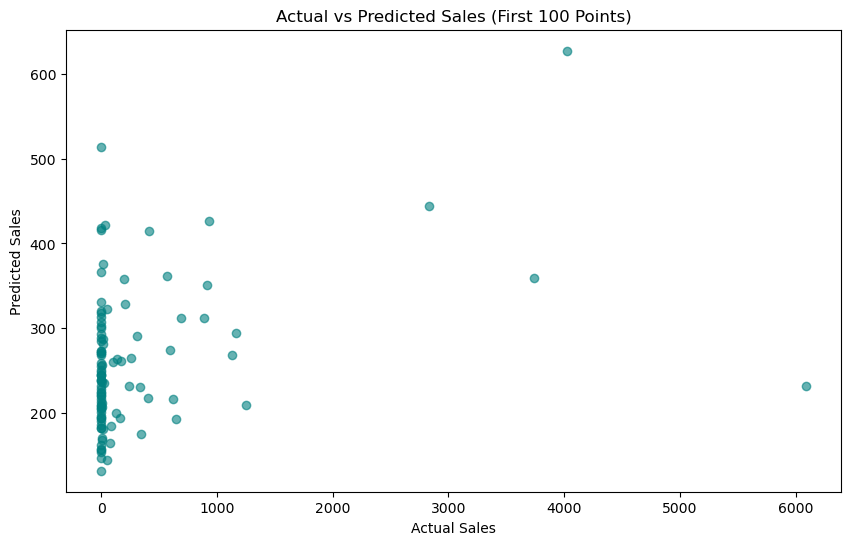

In [54]:
#Visualiz Actual Sales VS Predict Sales

# Make Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test[:100], y_pred[:100], color='teal', alpha=0.6)
plt.title("Actual vs Predicted Sales (First 100 Points)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# INTERMEDIATE TASK (PART 03)

## Task 3: Time Series Regression (Trend + Seasonality)
### Description: Extend regression to capture time-based patterns.

## Features:
###  Model trend using polynomial regression.
###  Capture seasonality with month/holiday indicators.
###  Compare performance with baseline linear regression.

## Tech Stack: Python, Pandas, Scikit-learn.
## Learning Outcomes: Learn regression adaptation for time-series data.

In [55]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
#Convert the datee coloum into date time
train_df['date'] = pd.to_datetime(train_df['date'])

In [57]:
# Create a numeric time index (days since start)
train_df['time_index'] = (train_df['date'] - train_df['date'].min()).dt.days
train_df['time_index'] 

30           0
31           0
32           0
63           0
64           0
          ... 
1060285    586
1060286    586
1060287    586
1060288    586
1060289    586
Name: time_index, Length: 156978, dtype: int64

In [58]:
#print data 
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,type,is_holiday,is_weekend,lag_1,lag_7,lag_30,time_index
30,30,2013-01-01,1,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
31,31,2013-01-01,1,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
32,32,2013-01-01,1,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
63,63,2013-01-01,10,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
64,64,2013-01-01,10,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
65,65,2013-01-01,10,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
96,96,2013-01-01,11,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
97,97,2013-01-01,11,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
98,98,2013-01-01,11,SEAFOOD,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0
129,129,2013-01-01,12,PRODUCE,0.0,0,2013,1,1,1,Holiday,1.0,0,0.0,0.0,0.0,0


In [59]:
#One-Hot Encode Seasonality (Months & Holidays)


# One-hot encode 'month' and 'is_holiday' for seasonality
train_df['month'] = train_df['date'].dt.month
print(train_df['month'])

# One-hot encoding for month (seasonality)
month_dummies = pd.get_dummies(train_df['month'], prefix='month', drop_first=True)
print(month_dummies)

# Merge with main dataframe
train_df = pd.concat([train_df, month_dummies], axis=1)
train_df

30         1
31         1
32         1
63         1
64         1
          ..
1060285    8
1060286    8
1060287    8
1060288    8
1060289    8
Name: month, Length: 156978, dtype: int32
         month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
30         False    False    False    False    False    False    False   
31         False    False    False    False    False    False    False   
32         False    False    False    False    False    False    False   
63         False    False    False    False    False    False    False   
64         False    False    False    False    False    False    False   
...          ...      ...      ...      ...      ...      ...      ...   
1060285    False    False    False    False    False    False     True   
1060286    False    False    False    False    False    False     True   
1060287    False    False    False    False    False    False     True   
1060288    False    False    False    False    False    False     True   
1

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
30,30,2013-01-01,1,PRODUCE,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,False,False
31,31,2013-01-01,1,SCHOOL AND OFFICE SUPPLIES,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,False,False
32,32,2013-01-01,1,SEAFOOD,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,False,False
63,63,2013-01-01,10,PRODUCE,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,False,False
64,64,2013-01-01,10,SCHOOL AND OFFICE SUPPLIES,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060285,1044247,2014-08-10,9,POULTRY,811.281000,0,2014,8,10,6,...,False,False,False,False,False,True,False,False,False,False
1060286,1044248,2014-08-10,9,PREPARED FOODS,67.807000,0,2014,8,10,6,...,False,False,False,False,False,True,False,False,False,False
1060287,1044249,2014-08-10,9,PRODUCE,0.000000,0,2014,8,10,6,...,False,False,False,False,False,True,False,False,False,False
1060288,1044250,2014-08-10,9,SCHOOL AND OFFICE SUPPLIES,0.000000,0,2014,8,10,6,...,False,False,False,False,False,True,False,False,False,False


In [60]:
#Polynomial Regression (for Trend)

# Polynomial transformation for trend
poly = PolynomialFeatures(degree=2, include_bias=False)
trend_poly = poly.fit_transform(train_df[['time_index']])
trend_poly_df = pd.DataFrame(trend_poly, columns=['time_index', 'time_index_squared'])

In [61]:
# Merge with main dataframe and print 
train_df = pd.concat([train_df.reset_index(drop=True), trend_poly_df], axis=1)
train_df

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,time_index,time_index_squared
0,30,2013-01-01,1,PRODUCE,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,0.0,0.0
1,31,2013-01-01,1,SCHOOL AND OFFICE SUPPLIES,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,0.0,0.0
2,32,2013-01-01,1,SEAFOOD,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,0.0,0.0
3,63,2013-01-01,10,PRODUCE,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,0.0,0.0
4,64,2013-01-01,10,SCHOOL AND OFFICE SUPPLIES,0.000000,0,2013,1,1,1,...,False,False,False,False,False,False,False,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156973,1044247,2014-08-10,9,POULTRY,811.281000,0,2014,8,10,6,...,False,False,False,True,False,False,False,False,586.0,343396.0
156974,1044248,2014-08-10,9,PREPARED FOODS,67.807000,0,2014,8,10,6,...,False,False,False,True,False,False,False,False,586.0,343396.0
156975,1044249,2014-08-10,9,PRODUCE,0.000000,0,2014,8,10,6,...,False,False,False,True,False,False,False,False,586.0,343396.0
156976,1044250,2014-08-10,9,SCHOOL AND OFFICE SUPPLIES,0.000000,0,2014,8,10,6,...,False,False,False,True,False,False,False,False,586.0,343396.0


In [62]:
#select Feature Vs Target

# Define features
feature_cols = ['time_index', 'time_index_squared', 'onpromotion', 'is_holiday', 'is_weekend'] + list(month_dummies.columns)
print(feature_cols)

# Input and target
x = train_df[feature_cols]
print(x)
y = train_df['sales']
print(y)

['time_index', 'time_index_squared', 'onpromotion', 'is_holiday', 'is_weekend', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']
        time_index  time_index  time_index_squared  onpromotion  is_holiday  \
0                0         0.0                 0.0            0         1.0   
1                0         0.0                 0.0            0         1.0   
2                0         0.0                 0.0            0         1.0   
3                0         0.0                 0.0            0         1.0   
4                0         0.0                 0.0            0         1.0   
...            ...         ...                 ...          ...         ...   
156973         586       586.0            343396.0            0         1.0   
156974         586       586.0            343396.0            0         1.0   
156975         586       586.0            343396.0            0         1.0   
156976

In [63]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
# Initialize and train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)
y_pred

array([269.89151735, 228.22130851, 210.6145182 , ..., 908.10963989,
       208.37912086, 304.24067663])

In [65]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Time Series Regression Metrics:")
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R-squared:", round(r2, 4))

Time Series Regression Metrics:
MSE: 760309.14
RMSE: 871.96
MAE: 383.05
R-squared: 0.0242


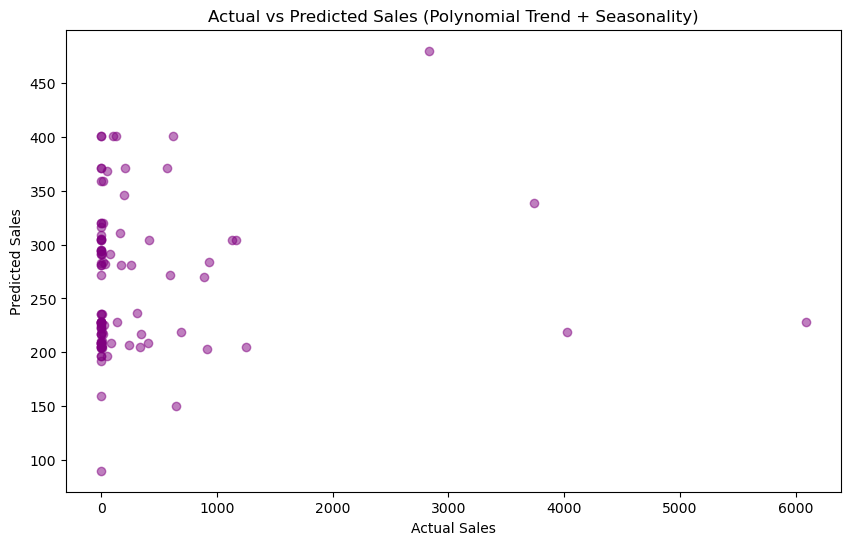

In [66]:
# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.5, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Polynomial Trend + Seasonality)")
plt.show()

# ADVANCED TASK (PART 01)

## Task 1: Regularized Regression (Ridge/Lasso)
### Description: Apply Ridge and Lasso regression to improve forecasting.

## Features:
###  Implement Ridge and Lasso regression.
###  Compare with Linear/Multiple regression.
###  Identify important features.

## Tech Stack: Python, Pandas, Scikit-learn.
## Learning Outcomes: Learn regularization to avoid overfitting.

In [67]:
#import  libraries 
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [68]:
# Feature columns (as created in previous part)
feature_cols = ['store_nbr', 'onpromotion', 'year', 'month', 'day', 'day_of_week', 'is_holiday', 'is_weekend', 'lag_1', 'lag_7', 'lag_30']
print(feature_cols)

# Inputs and target
x = train_df[feature_cols]
print(x)
y = train_df['sales']
print(y)

['store_nbr', 'onpromotion', 'year', 'month', 'day', 'day_of_week', 'is_holiday', 'is_weekend', 'lag_1', 'lag_7', 'lag_30']
        store_nbr  onpromotion  year  month  day  day_of_week  is_holiday  \
0               1            0  2013      1    1            1         1.0   
1               1            0  2013      1    1            1         1.0   
2               1            0  2013      1    1            1         1.0   
3              10            0  2013      1    1            1         1.0   
4              10            0  2013      1    1            1         1.0   
...           ...          ...   ...    ...  ...          ...         ...   
156973          9            0  2014      8   10            6         1.0   
156974          9            0  2014      8   10            6         1.0   
156975          9            0  2014      8   10            6         1.0   
156976          9            0  2014      8   10            6         1.0   
156977          9            

In [69]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
#Train Linear, Ridge & Lasso Models


# Linear Regression (baseline)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print("print y prediction linear", y_pred_linear)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # alpha = regularization strength
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)
print("print y prediction ridge", y_pred_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
print("print y prediction lasso", y_pred_lasso)

print y prediction linear [ 311.86667608  231.93811678  219.80453947 ... 1001.72967391  199.12304979
  330.42499379]
print y prediction ridge [ 311.86369558  231.9370221   219.79977759 ... 1001.7355384   199.12422497
  330.42257679]
print y prediction lasso [ 305.33103259  230.11580452  211.85147321 ... 1007.84991895  199.34435546
  326.52166211]


In [71]:
#Evaluation Function
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n {name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}")

In [72]:
# Evaluate all models
evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


 Linear Regression Performance:
RMSE: 868.20
MAE: 382.01
R2 Score: 0.0326

 Ridge Regression Performance:
RMSE: 868.20
MAE: 382.01
R2 Score: 0.0326

 Lasso Regression Performance:
RMSE: 868.25
MAE: 381.99
R2 Score: 0.0325


In [73]:
# Combine feature names with coefficients
linear_importance = pd.Series(linear_model.coef_, index=features).sort_values(key=abs, ascending=False)
ridge_importance = pd.Series(ridge_model.coef_, index=features).sort_values(key=abs, ascending=False)
lasso_importance = pd.Series(lasso_model.coef_, index=features).sort_values(key=abs, ascending=False)

print("\n Linear Feature Importances:")
print(linear_importance)

print("\n Ridge Feature Importances:")
print(ridge_importance)

print("\n Lasso Feature Importances:")
print(lasso_importance)


 Linear Feature Importances:
day            1.164008e+02
is_holiday     4.154146e+01
onpromotion    2.980306e+01
lag_7         -1.105578e+01
is_weekend     9.763730e+00
store_nbr      1.934970e+00
lag_1         -1.138021e+00
month          9.685137e-02
day_of_week   -2.348201e-02
year           1.632303e-02
lag_30        -4.298784e-13
dtype: float64

 Ridge Feature Importances:
day            116.385196
is_holiday      41.538777
onpromotion     29.802998
lag_7          -11.052793
is_weekend       9.763375
store_nbr        1.934969
lag_1           -1.138003
month            0.096852
day_of_week     -0.023482
year             0.016323
lag_30           0.000000
dtype: float64

 Lasso Feature Importances:
day            95.734263
is_holiday     35.166065
onpromotion    29.701157
is_weekend      9.007653
lag_7          -6.900623
store_nbr       1.929575
lag_1          -1.095077
month           0.097094
day_of_week    -0.023271
year            0.016585
lag_30          0.000000
dtype: float6

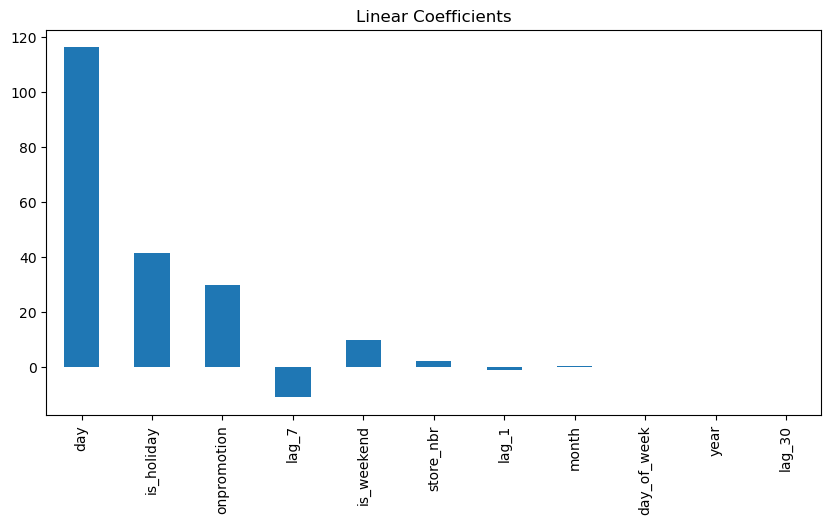

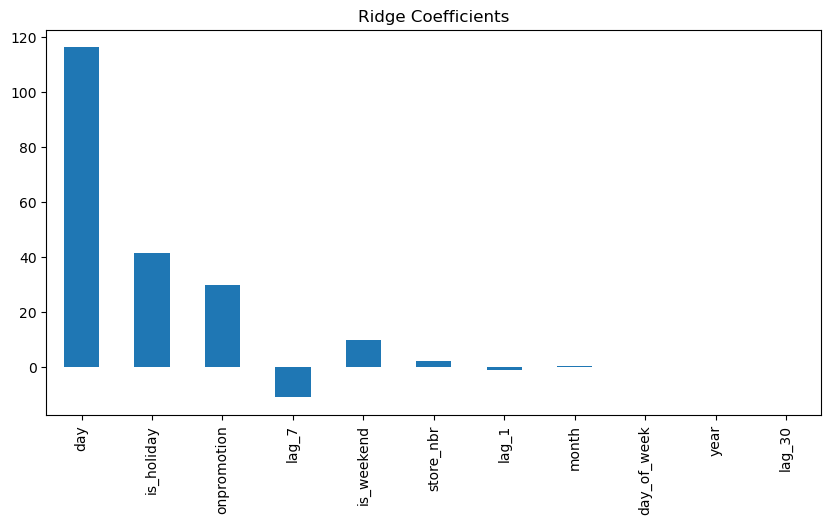

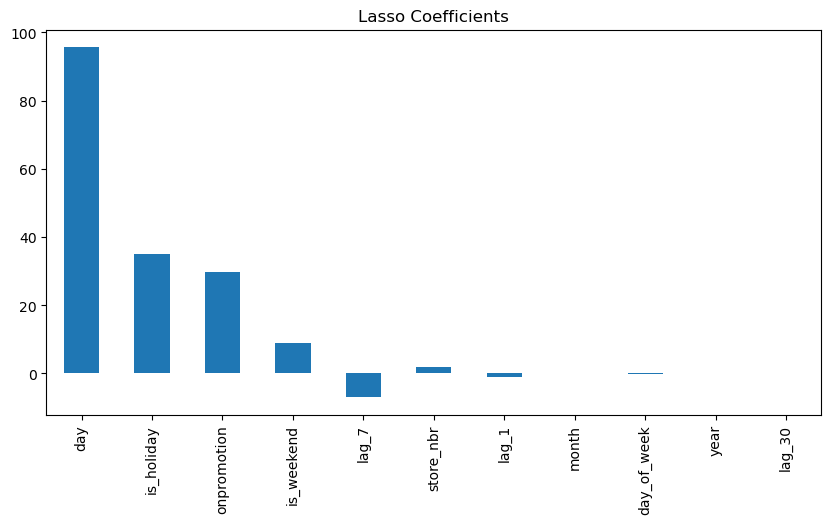

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
linear_importance.plot(kind='bar', title='Linear Coefficients')
plt.show()

plt.figure(figsize=(10,5))
ridge_importance.plot(kind='bar', title='Ridge Coefficients')
plt.show()

plt.figure(figsize=(10,5))
lasso_importance.plot(kind='bar', title='Lasso Coefficients')
plt.show()


# ADVANCED TASK (PART 02)

## Task 2: Regression with External Data
### Description: Enhance forecasts using additional external datasets.

## Features:
###  Merge dataset with weather/economic data.
###  Train a regression model with new features.
###  Measure improvement in accuracy.

## Tech Stack: Python, Pandas, Scikit-learn.
## Learning Outcomes: Learn how external factors improve prediction power.

In [75]:
#Print oil data
oil_df.head(10)

,date,dcoilwtico
0,1/1/2013,NaN
1,1/2/2013,93.14
2,1/3/2013,92.97
3,1/4/2013,93.12
4,1/7/2013,93.20
5,1/8/2013,93.21
6,1/9/2013,93.08
7,1/10/2013,93.81
8,1/11/2013,93.60
9,1/14/2013,94.27


In [76]:
#Check the null values
oil_df.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [77]:
#Fill thev bnull value usin back fill or front fill in dcoilwtico
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].ffill().bfill()

In [78]:
#Check again the null values present or not
oil_df.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [79]:
#convert date coloumn in to date and time 
oil_df['date'] = pd.to_datetime(oil_df['date'])

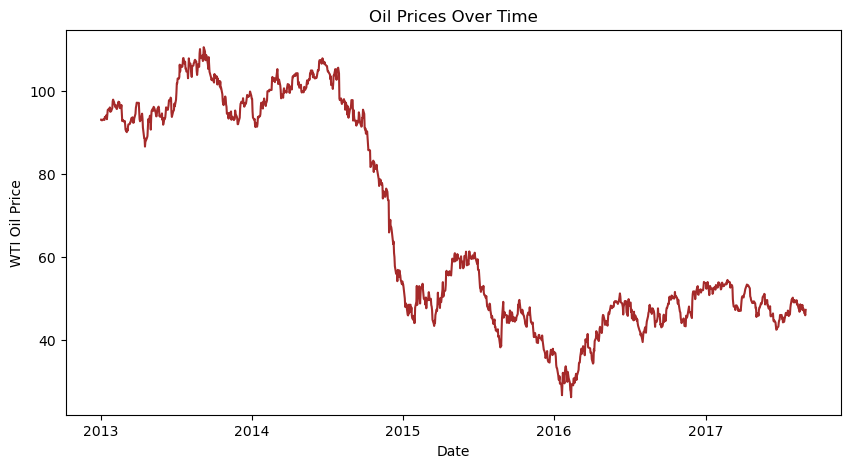

In [80]:
#Polt the values of dcoilwtico
plt.figure(figsize=(10,5))
plt.plot(oil_df['date'], oil_df['dcoilwtico'], color='brown')
plt.title("Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("WTI Oil Price")
plt.show()

In [81]:
#Merge the oil data by trasin data 
train_df = pd.merge(train_df, oil_df, on='date', how='left')
train_df.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,time_index,time_index_squared,dcoilwtico
0,30,2013-01-01,1,PRODUCE,0.0,0,2013,1,1,1,...,False,False,False,False,False,False,False,0.0,0.0,93.14
1,31,2013-01-01,1,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,...,False,False,False,False,False,False,False,0.0,0.0,93.14
2,32,2013-01-01,1,SEAFOOD,0.0,0,2013,1,1,1,...,False,False,False,False,False,False,False,0.0,0.0,93.14
3,63,2013-01-01,10,PRODUCE,0.0,0,2013,1,1,1,...,False,False,False,False,False,False,False,0.0,0.0,93.14
4,64,2013-01-01,10,SCHOOL AND OFFICE SUPPLIES,0.0,0,2013,1,1,1,...,False,False,False,False,False,False,False,0.0,0.0,93.14


In [82]:
# Fill any remaining nulls
train_df['dcoilwtico'] = train_df['dcoilwtico'].ffill().bfill()

In [83]:
#Check the null values again
train_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
year                  0
month                 0
day                   0
day_of_week           0
type                  0
is_holiday            0
is_weekend            0
lag_1                 0
lag_7                 0
lag_30                0
time_index            0
month_2               0
month_3               0
month_4               0
month_5               0
month_6               0
month_7               0
month_8               0
month_9               0
month_10              0
month_11              0
month_12              0
time_index            0
time_index_squared    0
dcoilwtico            0
dtype: int64

In [84]:
# Add oil price to features
feature_cols = ['time_index', 'time_index_squared', 'onpromotion', 'is_holiday', 'is_weekend', 'dcoilwtico'] + list(month_dummies.columns)
print(feature_cols)

x = train_df[feature_cols]
print(x)
y = train_df['sales']
print(y)

['time_index', 'time_index_squared', 'onpromotion', 'is_holiday', 'is_weekend', 'dcoilwtico', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']
        time_index  time_index  time_index_squared  onpromotion  is_holiday  \
0                0         0.0                 0.0            0         1.0   
1                0         0.0                 0.0            0         1.0   
2                0         0.0                 0.0            0         1.0   
3                0         0.0                 0.0            0         1.0   
4                0         0.0                 0.0            0         1.0   
...            ...         ...                 ...          ...         ...   
156973         586       586.0            343396.0            0         1.0   
156974         586       586.0            343396.0            0         1.0   
156975         586       586.0            343396.0            0        

In [85]:
#import  libraries 
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [86]:
#train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42) 

In [87]:
#Train mode use regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [88]:
#predict model
y_pred = model.predict(x_test)
print(y_pred)

[265.68282938 227.12994129 209.92510137 ... 908.18672389 208.05342305
 303.71984918]


In [89]:
# Metrics find values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation with External Data:")
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R²:", round(r2, 4))

Model Evaluation with External Data:
MSE: 760309.14
RMSE: 871.96
MAE: 383.04
R²: 0.0242


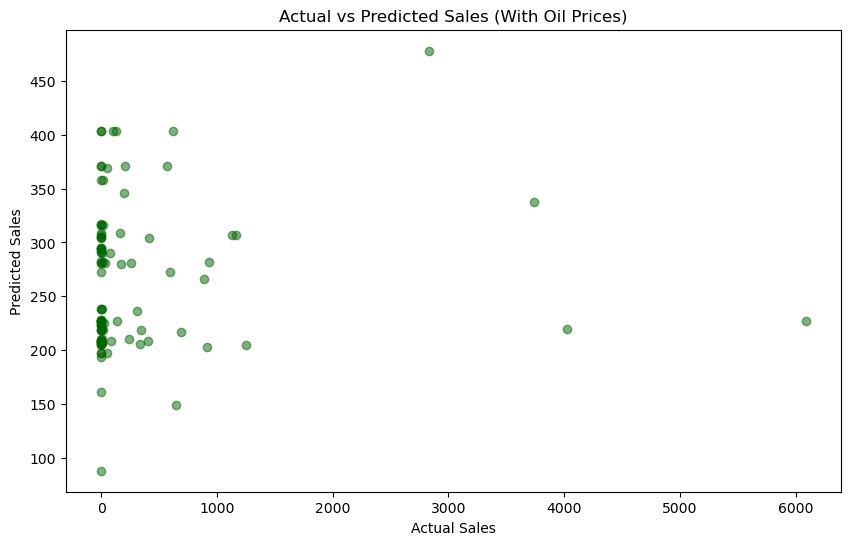

In [102]:
# Make a predict vs actual sale
plt.figure(figsize=(10,6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.5, color='darkgreen')
plt.title("Actual vs Predicted Sales (With Oil Prices)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()